# 4. 연습하기(1)

4번 연습하기(1) 혹은 연습하기(2) 중 하나를 선택해주세요

In [ ]:
!pip install wandb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import random
import os
import wandb
from wandb.keras import WandbCallback

In [ ]:
wandb.login()

## 4.1. 데이터셋 준비

In [ ]:
mnist = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

2.8.2
60000


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2) # 테스트 사이즈는 조절해주세요

In [ ]:
# Callback에서 사용할 경우 val_images와 val_labels를 생성해주세요

val_images, val_labels = X_test[:32], y_test[:32]

## 4.2. 데이터 분석

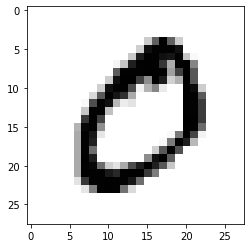

In [ ]:
plt.imshow(X_train[1],cmap=plt.cm.binary)
plt.show()

In [ ]:
print(y_train[1])

0


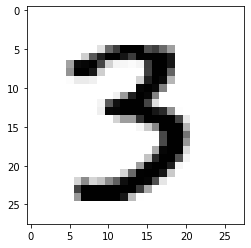

10001 번째 이미지의 숫자는 바로  3 입니다.


In [ ]:
index=random.ranint(0,20000)
plt.imshow(X_train[index],cmap=plt.cm.binary)
plt.show()
print( (index+1), '번째 이미지의 숫자는 바로 ',  y_train[index], '입니다.')

In [ ]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(60000, 28, 28)


In [ ]:
print('최소값:',np.min(X_train), ' 최대값:',np.max(X_train))

최소값: 0  최대값: 255


## 4.3. 데이터 전처리

In [ ]:
X_train, X_val, X_test = X_train / 255.0, X_val / 255.0, X_test / 255.0
print('최소값:',np.min(X_train), ' 최대값:',np.max(X_train))

최소값: 0.0  최대값: 1.0


In [ ]:
print("Before Reshape - x_train shape: {}".format(X_train.shape))
print("Before Reshape - x_val shape: {}".format(X_val.shape))
print("Before Reshape - x_test shape: {}".format(X_test.shape))

X_train = X_train.reshape( -1, 28, 28, 1)
X_val = X_val.reshape( -1, 28, 28, 1)
X_test = X_test.reshape( -1, 28, 28, 1)

print("After Reshape - x_train shape: {}".format(X_train.shape))
print("After Reshape - x_val shape: {}".format(X_val.shape))
print("After Reshape - x_test shape: {}".format(X_test.shape))

Before Reshape - x_train_norm shape: (48000, 28, 28)
Before Reshape - x_train_norm shape: (48000, 28, 28)
Before Reshape - x_test_norm shape: (10000, 28, 28)
After Reshape - x_train_reshaped shape: (48000, 28, 28, 1)
After Reshape - x_train_reshaped shape: (12000, 28, 28, 1)
After Reshape - x_test_reshaped shape: (10000, 28, 28, 1)


## 4.4. Sweep Config 만들기

In [ ]:
# yaml 파일로 만들어도 됩니다.

sweep_config = {
    "name": <YOUR CODE>,
    "metric": <YOUR CODE>,
    "method": <YOUR CODE>,
    "parameters": {<YOUR CODE>}
    }

## 4.5. Train 함수 생성하기

In [ ]:
def train():
    default_config = {<YOUR CODE>}

    wandb.init(config = default_config)
    config = wandb.config

    # Model을 만들어주세요

    model = <YOUR CODE>

    # optimizer와 metrics를 입력해주세요
    
    model.compile(<YOUR CODE>)

    # wandb callback을 사용해보세요

    model.fit(X_train, y_train,
              epochs = config.epochs,
              batch_size = config.batch_size,
              validation_data = (X_val, y_val),
              callbacks = [<YOUR CODE>])
    
    # model을 평가해주세요

    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)

    # log에 저장할 항목을 설정해주세요
    wandb.log(<YOUR CODE>)

## 4.6. Sweep id, agent 생성 및 run 하기

In [ ]:
# sweep id 생성하기

sweep_id = wandb.sweep(sweep_config)

# run the sweep
wandb.agent(sweep_id,
            function=train,
            entity = <YOUR CODE>,
            project = <YOUR CODE>)

In [ ]:
wandb.finish()